In [2]:
import sys
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

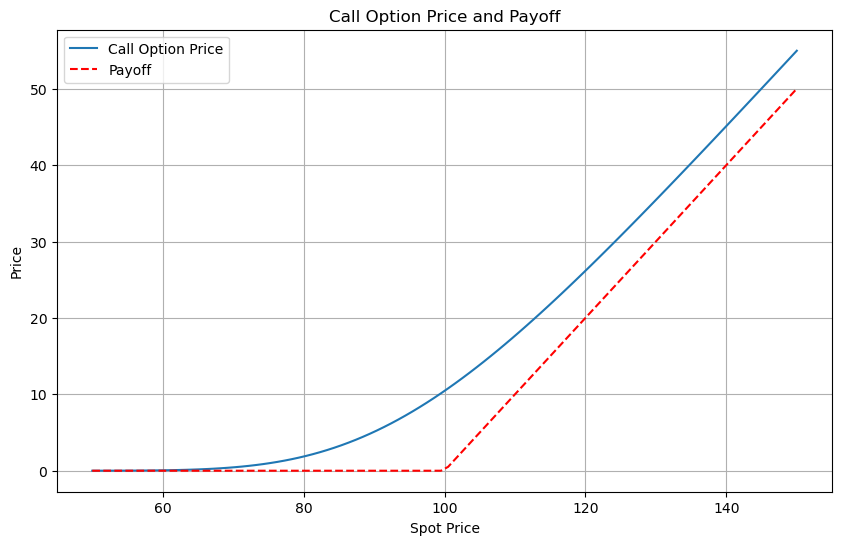

In [3]:


# Black-Scholes formula for call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Example parameters
S = np.linspace(50, 150, 100)  # Spot price
K = 100  # Strike price
T = 1  # Time to maturity in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Calculate call prices
call_prices = black_scholes_call(S, K, T, r, sigma)

# Calculate payoff
payoff = np.maximum(S - K, 0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, call_prices, label='Call Option Price')
plt.plot(S, payoff, 'r--', label='Payoff')
plt.xlabel('Spot Price')
plt.ylabel('Price')
plt.title('Call Option Price and Payoff')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Black-Scholes formula for call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for put option price
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Function to update the plot
def update_plot(K=100, T=1, r=0.05, sigma=0.2):
    # Create a range of spot prices around the slider value
    S_range = np.linspace(50, 150, 100)  # Define a range of spot prices
    call_prices = black_scholes_call(S_range, K, T, r, sigma)
    put_prices = black_scholes_put(S_range, K, T, r, sigma)
    
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, call_prices, label='Call Prices')
    plt.plot(S_range, put_prices, label='Put Prices')
    plt.xlabel('Spot Price')
    plt.ylabel('Option Price')
    plt.title('Black-Scholes Option Pricing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price:')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity:')
r_slider = widgets.FloatSlider(value=0.005, min=0, max=0.1, step=0.005, description='Risk-Free Rate:')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.01, description='Volatility:')

# Create interactive widget plot
interactive_plot = widgets.interactive(
    update_plot, K=K_slider, T=T_slider, r=r_slider, sigma=sigma_slider
)
display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, description='Strike Price:', max=150.0, min=50.0, step=1.0), Fl…

In [5]:
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Parameters
S = 4500  # Spot price
K = 4400  # Strike price
T = 0.5   # Time to maturity (in years)
r = 0.02  # Risk-free rate
sigma = 0.20  # Volatility

# Computing delta
#delta = call_delta(S, K, T, r, sigma)
#print(f"Delta du call : {delta:.3f}")

# Function to update the plot
def update_plot(K=100, T=1, r=0.05, sigma=0.2):
    # Use a fixed range of spot prices for the plot
    S_range = np.linspace(50, 150, 100)  # Define a range of spot prices
    delta_values = np.array([call_delta(S_i, K, T, r, sigma) for S_i in S_range])  # Compute Delta for each spot price 
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, delta_values, label='Call Delta')
    plt.axvline(x=K, color='r', linestyle='--', label='Strike Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Delta of the Option')
    plt.title('Delta of a Call Option')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price:')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity:')
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Risk-Free Rate:')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.01, description='Volatility:')

# Create interactive widget plot
interactive_plot = widgets.interactive(
    update_plot, K=K_slider, T=T_slider, r=r_slider, sigma=sigma_slider
)
display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, description='Strike Price:', max=150.0, min=50.0, step=1.0), Fl…

# Gamma

In [6]:
# Black-Scholes Gamma calculation
def call_gamma(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1)*np.exp(- q * T) / (S * sigma * np.sqrt(T))  # PDF of the normal distribution
    return gamma

#example of dividend yield 
q= 0.02


In [7]:
def update_plot(K=100, T=1, r=0.05, sigma=0.2):
    # Use a fixed range of spot prices for the plot
    S_range = np.linspace(50, 150, 100)  # Define a range of spot prices
    gamma_values = np.array([call_gamma(S_i, K, T, r, q, sigma) for S_i in S_range])  # Compute Gamma for each spot price
    
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, gamma_values, label='Call Gamma')
    plt.xlabel('Spot Price')
    plt.ylabel('Gamma of the Option')
    plt.title('Gamma of a Call Option')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price:')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity:')
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Risk-Free Rate:')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.01, description='Volatility:')

# Create interactive widget plot
interactive_plot = widgets.interactive(
    update_plot, K=K_slider, T=T_slider, r=r_slider, sigma=sigma_slider
)
display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, description='Strike Price:', max=150.0, min=50.0, step=1.0), Fl…

# Theta

In [9]:
def call_theta(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = -S * norm.pdf(d1) * sigma *np.exp(- q * T)/ (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2) + q * norm.pdf(d1) * S * np.exp(- q * T)
    return theta


def put_thetas(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = -S * norm.pdf(d1) * sigma *np.exp(- q * T)/ (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2) - q * norm.pdf(-d1) * S * np.exp(- q * T)
    return theta


In [10]:
def update_plot(K=100, T=1, r=0.05, sigma=0.2):
    # Use a fixed range of spot prices for the plot
    S_range = np.linspace(50, 150, 100)  # Define a range of spot prices
    theta_values = np.array([call_theta(S_i, K, T, r, q, sigma) for S_i in S_range])  # Compute Theta for each spot price
    
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, theta_values, label='Call Theta')
    plt.xlabel('Spot Price')
    plt.ylabel('Theta of the Option')
    plt.title('Theta of a Call Option')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price:')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity:')
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Risk-Free Rate:')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.01, description='Volatility:')

# Create interactive widget plot
interactive_plot = widgets.interactive(
    update_plot, K=K_slider, T=T_slider, r=r_slider, sigma=sigma_slider
)
display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, description='Strike Price:', max=150.0, min=50.0, step=1.0), Fl…

In [11]:
# TOFIX

def call_rho(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    return rho

In [12]:
def update_plot(K=100, T=1, r=0.05, sigma=0.2):
    # Use a fixed range of spot prices for the plot
    S_range = np.linspace(50, 150, 100)  # Define a range of spot prices
    theta_values = np.array([call_rho(S, K, T, r, q, sigma) for S_i in S_range])  # Compute Rho for each spot price
    
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, theta_values, label='Call Rho')
    plt.xlabel('Spot Price')
    plt.ylabel('Rho of the Option')
    plt.title('Rho of a Call Option')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price:')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity:')
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Risk-Free Rate:')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.01, description='Volatility:')

# Create interactive widget plot
interactive_plot = widgets.interactive(
    update_plot, K=K_slider, T=T_slider, r=r_slider, sigma=sigma_slider
)
display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, description='Strike Price:', max=150.0, min=50.0, step=1.0), Fl…

## Spreads

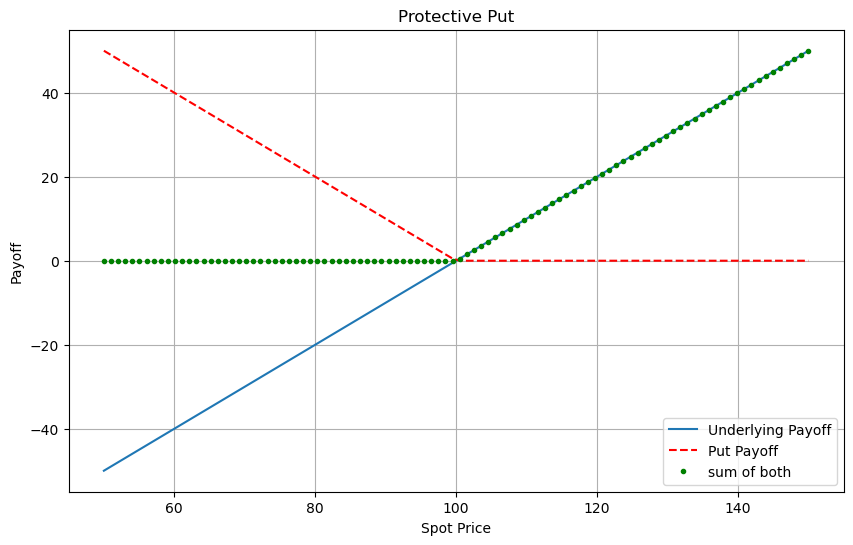

In [ ]:
#Protective Put
#Options caracteristics

K = 100
T = 1  
r = 0.05  
sigma = 0.2  
S = np.linspace(50, 150, 100)
max_array = np.maximum(K - S, 0)
Sum_array = S - K + max_array

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, S - K, label='Underlying Payoff')
plt.plot(S, max_array, 'r--', label='Put Payoff')
plt.plot(S, Sum_array, 'g.',label = 'sum of both')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Protective Put')
plt.legend()
plt.grid(True)
plt.show()

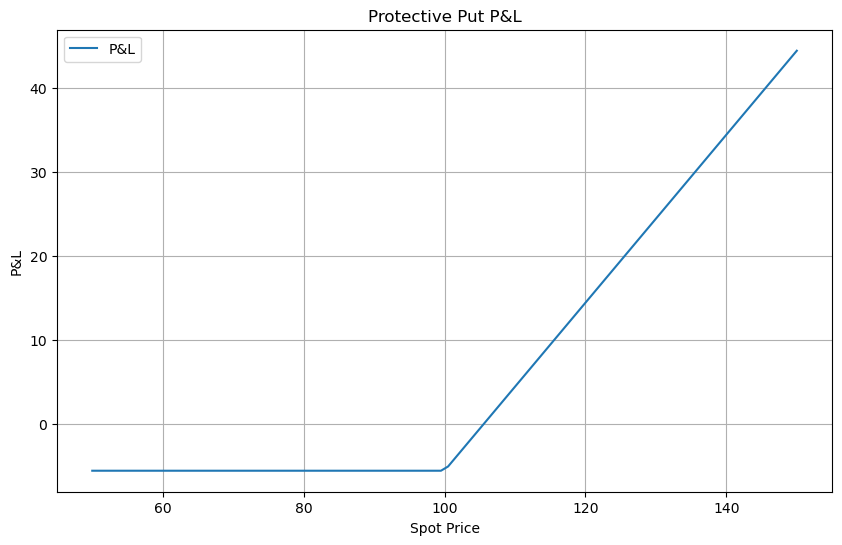

In [24]:
#Adding the put price to build the P/L graph

Price = black_scholes_put(K,K,T,r,sigma)

P_L = Sum_array - Price

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, P_L, label='P&L')
plt.xlabel('Spot Price')
plt.ylabel('P&L')
plt.title('Protective Put P&L')
plt.legend()
plt.grid(True)
plt.show()

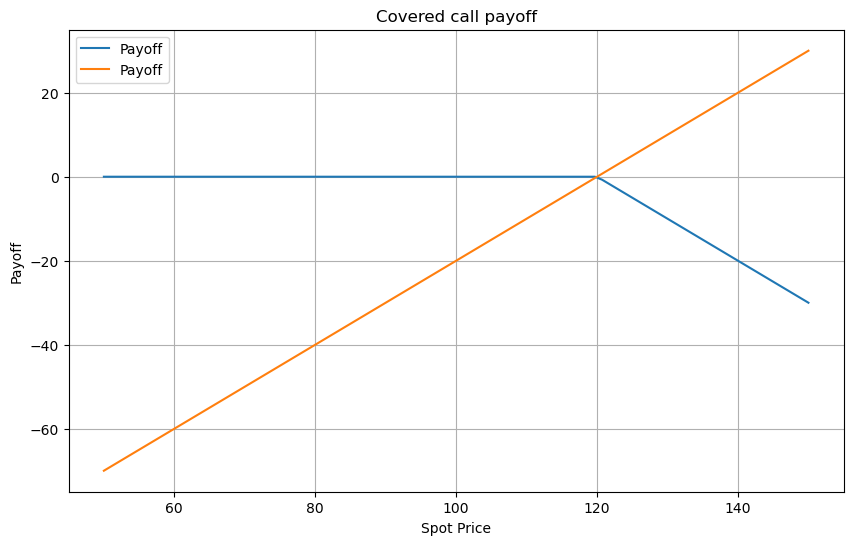

In [34]:
#Covered Call writing

#Options caracteristics
S = 100
K = 120
T = 1  
r = 0.05  
sigma = 0.2  
C = black_scholes_call(S, K, T, r, sigma)
S = np.linspace(50, 150, 100)
call_payoff = np.maximum(S - K , 0)
short_call = - call_payoff



# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, short_call, label='Payoff')
plt.plot(S, S - K, label='Payoff')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Covered call payoff')
plt.legend()
plt.grid(True)
plt.show()

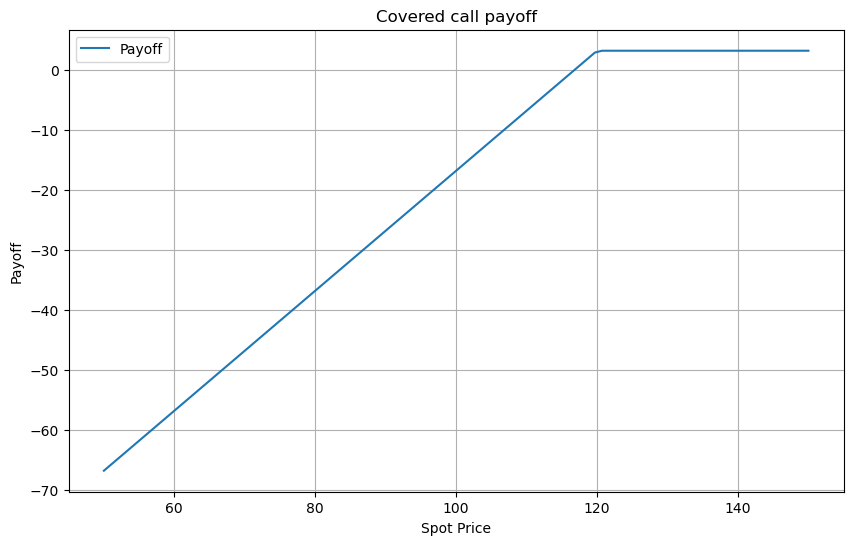

In [35]:
# P&L

P_L = C + short_call + S - K

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, P_L, label='Payoff')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Covered call payoff')
plt.legend()
plt.grid(True)
plt.show()

## Collar

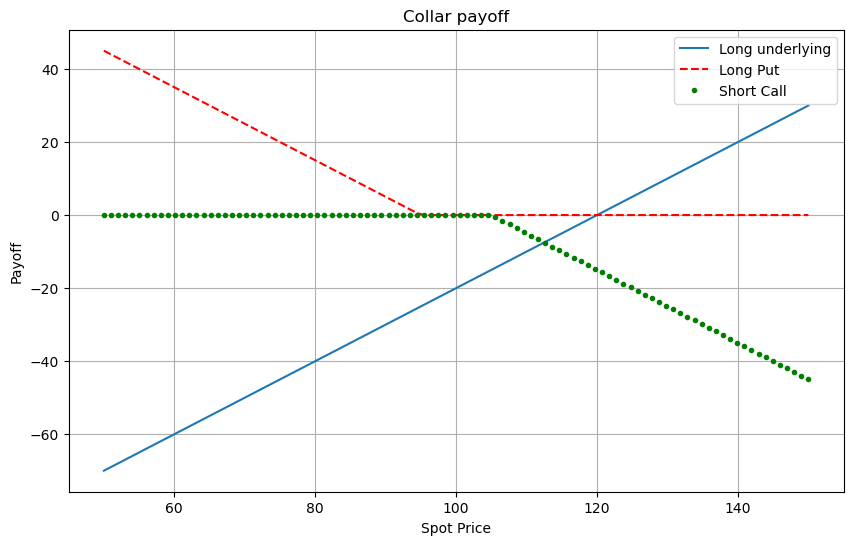

In [44]:
#Collar
S = 100
K_1 = 95
K_2 = 105
T = 1  
r = 0.05  
sigma = 0.2 
P,C = black_scholes_put(S,K_1,T,r,sigma),black_scholes_call(S,K_2,T,r,sigma)

S = np.linspace(50, 150, 100)

#Long put
long_put = np.maximum(K_1 - S , 0)
#Short call
short_call = - np.maximum(S - K_2 , 0)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, S - K, label='Long underlying')
plt.plot(S, long_put,'r--' ,label='Long Put')
plt.plot(S, short_call,'g.', label='Short Call')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Collar payoff')
plt.legend()
plt.grid(True)
plt.show()

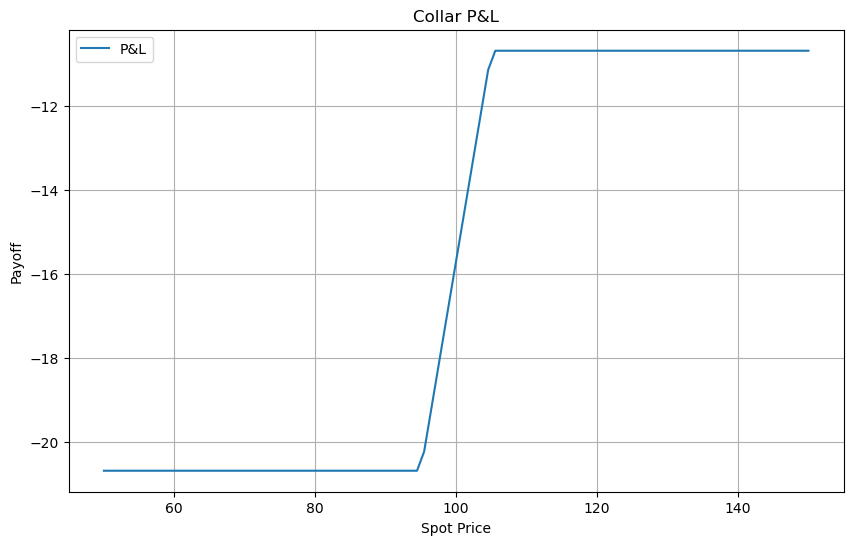

In [45]:
#P&L

P_L = C - P + long_put + short_call + S - K

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, P_L, label='P&L')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Collar P&L')
plt.legend()
plt.grid(True)
plt.show()

## Spreads

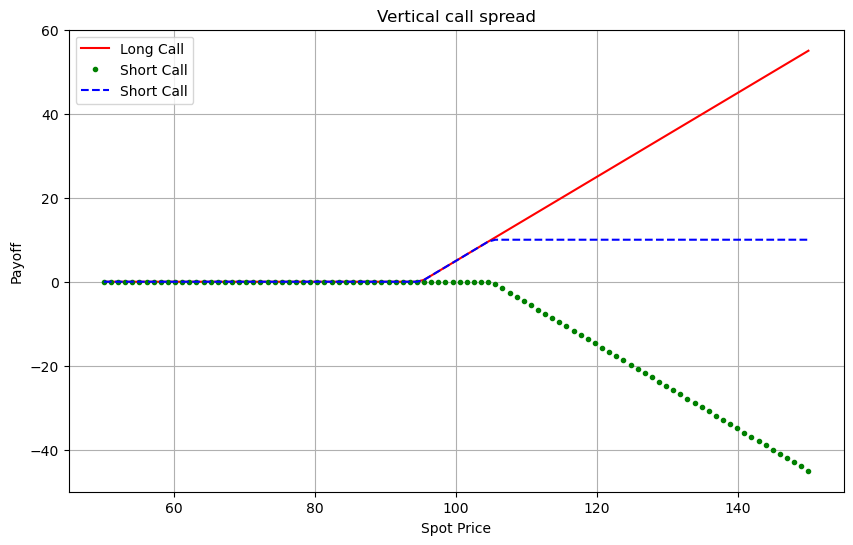

In [70]:
#Bullish vertical spread with call options
S = 100
K_1 = 95
K_2 = 105
T = 1  
r = 0.05  
sigma = 0.2 
C_1,C_2 = black_scholes_call(S,K_1,T,r,sigma),black_scholes_call(S,K_2,T,r,sigma)
premium = - C_1 + C_2

S = np.linspace(50, 150, 100)

long_call = np.maximum(S - K_1 , 0)
Short_call = - np.maximum(S - K_2 , 0)

Combinaison = long_call + Short_call

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, long_call,'r-' ,label='Long Call')
plt.plot(S, short_call,'g.', label='Short Call')
plt.plot(S, Combinaison,'b--', label='Short Call')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Vertical call spread')
plt.legend()
plt.grid(True)
plt.show()


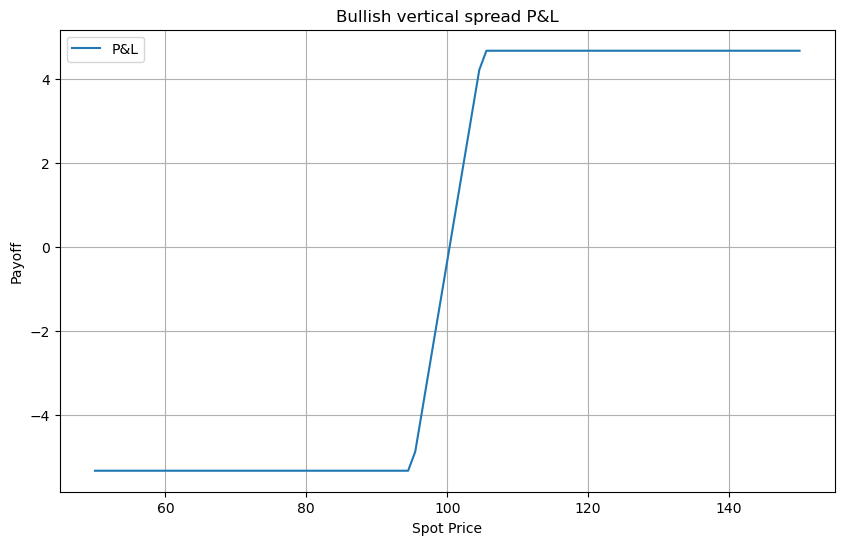

In [54]:
#P&L
P_L = Combinaison + premium

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, P_L, label='P&L')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Bullish vertical spread P&L')
plt.legend()
plt.grid(True)
plt.show()


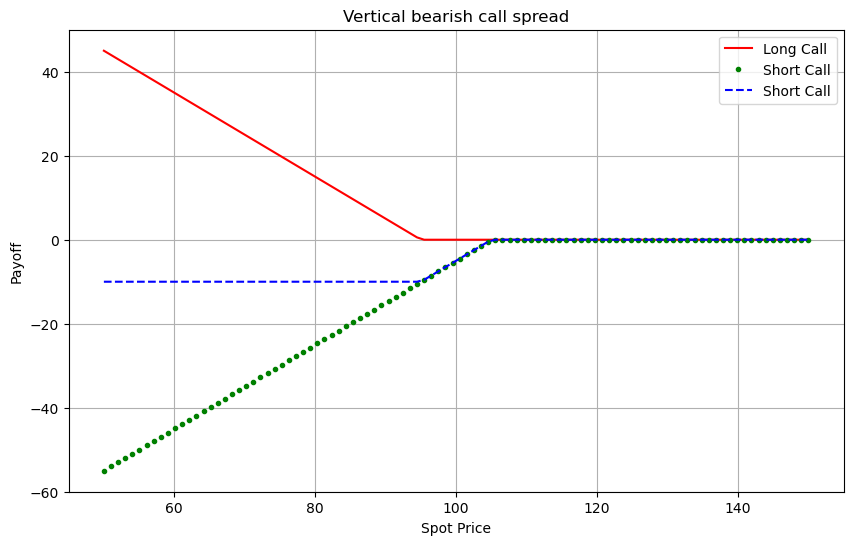

In [81]:
#Bullish vertical spread with put options
S = 100
K_1 = 95
K_2 = 105
T = 1 
r = 0.05  
sigma = 0.2 
P_1,P_2 = black_scholes_put(S,K_1,T,r,sigma),black_scholes_put(S,K_2,T,r,sigma)
premium =  - P_1 + P_2

S = np.linspace(50, 150, 100)

long_put = np.maximum(K_1 - S, 0)
short_put = -np.maximum(K_2 - S, 0)

Combinaison = long_put + short_put

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, long_put,'r-' ,label='Long Call')
plt.plot(S, short_put,'g.', label='Short Call')
plt.plot(S, Combinaison,'b--', label='Short Call')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Vertical bearish call spread')
plt.legend()
plt.grid(True)
plt.show()


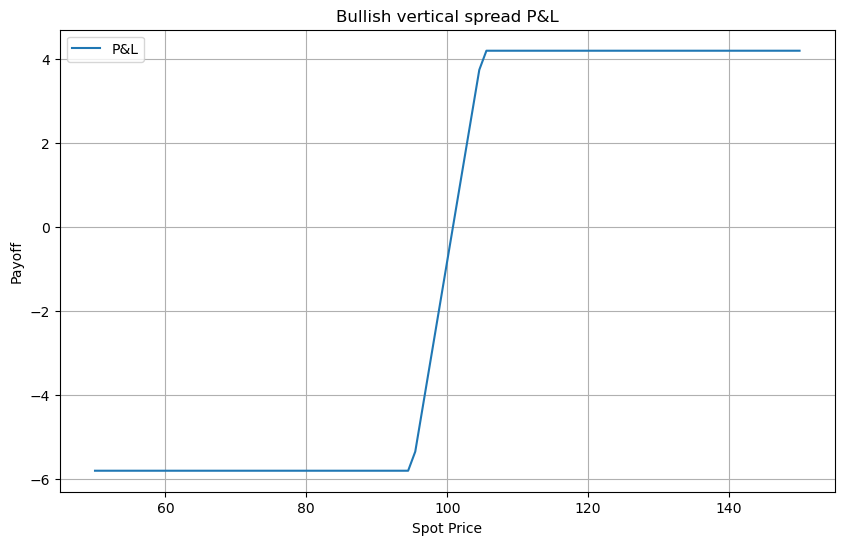

In [80]:
#P&L
P_L = Combinaison + premium

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, P_L, label='P&L')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title('Bullish vertical spread P&L')
plt.legend()
plt.grid(True)
plt.show()


## Box spread

In [ ]:
#TODO

## Straddle

In [ ]:
#Straddle spread



## Binomial pricings ##

Cox-Ross-Rubinstein model assumptions
- One risky and one risk free asset
- Trading is opened at discrete times
- The duration between two dates is of lenght delta_t
- Over one period, two outcomes are possible for the stock price
• up move
• down move
- There are no transaction costs
- Volatility remains constant over time

In [8]:
import numpy as np

#Two assets
#Risky asset and risk free asset
S_t = [{'time': 0, 'price': 20}, {'time': 1/3, 'price': 22}]
S_0 = 20

R_0 = 1

S_1 = 22 #T = 1/3 case 1
S_2 = 18 #T = 1/3 case 2

R_1 = 1.01 #riskless asset at T = 1/3

# Call option on the risky asset
K = 21

payoff_1 = max(S_1 - K, 0)
payoff_2 = max(S_2 - K, 0)

#Step 1 calculate option payoff

#step 2 build a replication portfolio for this specific option
""" 
- delta: Shares
- B: Investement / borrowing
"""

# portfolio constituents

delta = 1
B = -20

#Portfolio value at time T = 1/3

#case 1

V_1 = delta * S_1 + B * R_1
V_2 = delta * S_2 + B * R_1

print(V_1,V_2)

1.8000000000000007 -2.1999999999999993


In [ ]:
#I want to find the delta and B that will make the portfolio value equal to the payoff of the option

#imagine we found a cost of 0.545 for the option and the market is trading at 0.5, the arbitrage opportunity is to buy the option and do a sell the replication portoflio